NLP Practical 2

In [1]:
import numpy as np
import os
from random import shuffle
import re
import sklearn as sk
import matplotlib.pyplot as plt
import random

In [2]:
import urllib.request
import zipfile
import lxml.etree

In [4]:
import tensorflow as tf

In [5]:
with zipfile.ZipFile('ted_en-20160408.zip', 'r') as z:
    doc = lxml.etree.parse(z.open('ted_en-20160408.xml', 'r'))
    
input_text = doc.xpath('//content/text()')
input_label = doc.xpath('//head/keywords/text()')

del doc

In [6]:
talk_sentences = []
talknum = len(input_text)

for i in range(talknum):
    temp = re.sub(r'\([^)]*\)', '', input_text[i])
    temp = re.sub(r'\n', '', input_text[i])
    temp = temp.split('.')
    talk_sentences.append(temp)

In [7]:
print(talk_sentences[0][1])

To me the real, real solution to quality growth is figuring out the balance between two activities: exploration and exploitation


In [8]:
talk_sentences_token = []

for talk in talk_sentences:
    temp = []
    for sent in talk:
        tokens = re.sub(r"[^a-z0-9]+", " ", sent.lower()).split()
        temp.append(tokens)#
    talk_sentences_token.append(temp)

In [9]:
talk_sentences_token[0][1]

['to',
 'me',
 'the',
 'real',
 'real',
 'solution',
 'to',
 'quality',
 'growth',
 'is',
 'figuring',
 'out',
 'the',
 'balance',
 'between',
 'two',
 'activities',
 'exploration',
 'and',
 'exploitation']

In [10]:
input_label_prepro = []

for i in range(len(input_label)):
    temp = re.sub(r' ', '', input_label[i])
    input_label_prepro.append(temp.split(','))
    
#print(input_label_prepro)

In [11]:
labels = []

for i in range(len(input_label_prepro)):
    temp = np.zeros(3)
    if 'technology' in '~'.join(input_label_prepro[i]):
        temp[0] = 1
    if 'entertainment' in '~'.join(input_label_prepro[i]):
        temp[1] = 1
    if 'design' in '~'.join(input_label_prepro[i]):
        temp[2] = 1
    labels.append(temp)
        
print(input_label_prepro[9])
print(labels[:10])

['talks', 'Senses', 'augmentedreality', 'brain', 'computers', 'creativity', 'cyborg', 'demo', 'design', 'engineering', 'entrepreneur', 'innovation', 'interfacedesign', 'invention', 'neuroscience', 'potential', 'prediction', 'productdesign', 'technology', 'visualizations']
[array([ 0.,  0.,  0.]), array([ 0.,  0.,  0.]), array([ 0.,  0.,  0.]), array([ 0.,  0.,  1.]), array([ 1.,  0.,  1.]), array([ 0.,  0.,  0.]), array([ 0.,  0.,  0.]), array([ 0.,  0.,  0.]), array([ 0.,  0.,  0.]), array([ 1.,  0.,  1.])]


In [12]:
# labels_onehot = np.zeros(len(input_label_prepro), 8)
# for i in range(len(input_label_prepro)):
#     labels_onehot[i][labels[i][0]*4+labels[i][1]*2+labels[i][2]*1] = 1

In [13]:
labels_onehot = []
for i in range(len(input_label_prepro)):
    temp = np.zeros(8)
    temp[labels[i][0]*4+labels[i][1]*2+labels[i][2]*1] = 1
    labels_onehot.append(temp)

/home/scratch/ms16lg2/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [14]:
labels_onehot[:10]

[array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.]),
 array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.])]

In [15]:
train_data = talk_sentences_token[:1585]
validation_data = talk_sentences_token[1585:1835]
test_data = talk_sentences_token[1835:]

train_labels = labels[:1585]
validation_labels = labels[1585:1835]
test_labels = labels[1835:]

train_labels_onehot = labels_onehot[:1585]
validation_labels_onehot = labels_onehot[1585:1835]
test_labels_onehot = labels_onehot[1835:]

In [16]:
print(np.shape(talk_sentences_token))
print(np.shape(labels))
print(np.shape(labels_onehot))
print(np.shape(train_data))
print(np.shape(train_labels))
print(np.shape(train_labels_onehot))
print(np.shape(validation_data))
print(np.shape(validation_labels))
print(np.shape(validation_labels_onehot))
print(np.shape(test_data))
print(np.shape(test_labels))
print(np.shape(test_labels_onehot))

(2085,)
(2085, 3)
(2085, 8)
(1585,)
(1585, 3)
(1585, 8)
(250,)
(250, 3)
(250, 8)
(250,)
(250, 3)
(250, 8)


In [17]:
check = np.asarray(train_labels_onehot)
print(check.sum(0) / check.sum())
check = np.asarray(test_labels_onehot)
print(check.sum(0) / check.sum())
check = np.asarray(validation_labels_onehot)
print(check.sum(0) / check.sum())

[ 0.61135647  0.07066246  0.06246057  0.00630915  0.17350158  0.05362776
  0.01198738  0.01009464]
[ 0.292  0.108  0.164  0.024  0.224  0.112  0.032  0.044]
[ 0.344  0.1    0.132  0.032  0.2    0.128  0.036  0.028]


In [18]:
train_sent = []

for i in range(1585):
    for sent in train_data[i]:
        train_sent.append(sent)
    
print(np.size(train_sent))

183771


In [19]:
from gensim.models import Word2Vec

In [20]:
model_ted = Word2Vec(train_sent, min_count=1, size=100)

In [21]:
'hello' in model_ted.vocab.keys()

True

In [22]:
train_bow = []

for talk in train_data:
    N = 0
    res = np.zeros(100)
    for sent in talk:
        for word in sent:
            if word in model_ted.vocab.keys():
                res += model_ted[word]
                N += 1
    res = res / N
    train_bow.append(res)

In [23]:
train_bow[0]

array([ 0.48064221,  0.10713382,  0.34112421,  0.15859221, -0.13296951,
       -0.27684198,  0.77126868,  0.29960441, -0.20754856,  0.50103537,
        0.40492465,  0.63694045, -1.00509388,  0.16221571, -0.10920931,
       -0.46761485,  0.01498722,  0.97902562,  0.084146  ,  0.16678651,
       -0.31133417, -0.19713413,  0.70212488,  0.49254737, -0.52414193,
       -0.39454126, -0.14148676, -0.21034091, -0.12500248,  0.05371923,
        0.30800115,  0.04888592,  0.51499449,  0.27562222, -0.71723815,
       -0.01131099, -0.43862987,  0.55192926, -0.17672698,  0.32041188,
        0.45827609, -0.56627715,  0.35302428,  0.66241424,  0.09961743,
        0.15537007, -0.62785812,  0.25435805,  0.0155988 ,  0.14363663,
       -0.03366646, -0.13906106, -0.37502561,  0.22349857,  0.25652862,
       -0.51448958,  0.17023668, -0.14127629, -0.10368759, -0.44615151,
       -0.29086424,  0.12305164, -0.11638643,  0.61868604, -0.13831466,
       -0.1287993 ,  0.00254941, -0.04436699,  0.25985376,  0.16

In [24]:
validation_bow = []

for talk in validation_data:
    N = 0
    res = np.zeros(100)
    for sent in talk:
        for word in sent:
            if word in model_ted.vocab.keys():
                res += model_ted[word]
                N += 1
    res = res / N
    validation_bow.append(res)

In [25]:
test_bow = []

for talk in test_data:
    N = 0
    res = np.zeros(100)
    for sent in talk:
        for word in sent:
            if word in model_ted.vocab.keys():
                res += model_ted[word]
                N += 1
    res = res / N
    test_bow.append(res)

In [27]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.05)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

In [94]:
node_count = 20

x = tf.placeholder(tf.float32, shape=[None, 100])
y_ = tf.placeholder(tf.float32, shape=[None, 8])

# Define the first layer here
W = weight_variable([100, node_count])
b = bias_variable([node_count])
h = tf.nn.tanh(tf.matmul(x, W) + b)

# Define the first layer here
V = weight_variable([node_count, 8])
c = bias_variable([8])
y = tf.nn.softmax(tf.matmul(h, V) + c)

# We'll use the cross entropy loss function 
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, y_))

# And classification accuracy
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# And the Adam optimiser
train_step = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(cross_entropy)

# Start a tf session and run the optimisation algorithm
sess = tf.Session()
sess.run(tf.initialize_all_variables())

input_data = train_bow
input_labels = train_labels_onehot
train_accuracy = np.zeros(31)
test_accuracy = np.zeros(31)
N = 0
C = 0

for epoch in range(10):
    for bat in range(len(input_data) // 50):
        data_batch = input_data[bat * 50 : (bat + 1) * 50]
        labels_batch = input_labels[bat * 50 : (bat + 1) * 50]
        N += 1
        if N % 10 == 0:
            train_accuracy[C] = sess.run(accuracy, feed_dict={x: data_batch, y_: labels_batch})
            test_accuracy[C] = sess.run(accuracy, feed_dict={x: test_bow, y_: test_labels_onehot})
            C += 1
        sess.run(train_step, feed_dict={x: data_batch, y_: labels_batch})
    temp = list(zip(input_data, input_labels))
    random.shuffle(temp)
    input_data, input_labels = zip(*temp)

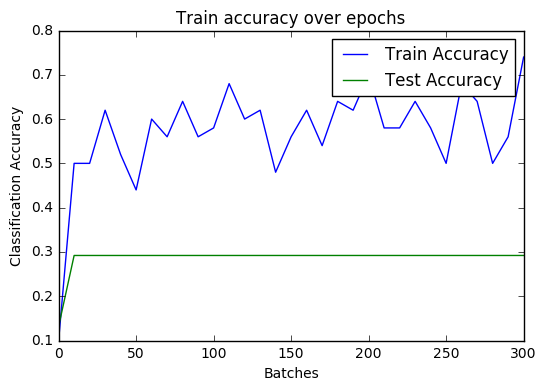

In [95]:
x_val_plt = np.array(range(31)) * 10
np_train_accuracy = np.array(train_accuracy)
np_test_accuracy = np.array(test_accuracy)

plt.plot(x_val_plt, np_train_accuracy, label = "Train Accuracy")
plt.plot(x_val_plt, np_test_accuracy, label = "Test Accuracy")
plt.title("Train accuracy over epochs")
plt.xlabel("Batches")
plt.ylabel("Classification Accuracy")
plt.legend()
plt.show()

In [96]:
sess.run(accuracy, feed_dict={x: validation_bow, y_: validation_labels_onehot})

0.34400001

In [97]:
sess.run(accuracy, feed_dict={x: test_bow, y_: test_labels_onehot})

0.292

In [98]:
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.plotting import figure, show, output_file
#from bokeh.io import output_notebook
#output_notebook()

In [99]:
with sess.as_default():
    features = V.eval()
print(np.shape(features))
features = np.transpose(features)
print(np.shape(features))

(20, 8)
(8, 20)


In [100]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
PCA_features = tsne.fit_transform(features)

In [101]:
p = figure(tools="pan,wheel_zoom,reset,save",
           toolbar_location="above",
           title="word2vec T-SNE for most common words")

source = ColumnDataSource(data=dict(x1=PCA_features[:,0],
                                    x2=PCA_features[:,1],
                                    names=['ooo','ooD','oEo','oED','Too','ToD','TEo','TED']))

p.scatter(x="x1", y="x2", size=8, source=source)

labels = LabelSet(x="x1", y="x2", text="names", y_offset=6,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
p.add_layout(labels)

show(p)

In [102]:
node_count = 20

x = tf.placeholder(tf.float32, shape=[None, 100])
y_ = tf.placeholder(tf.float32, shape=[None, 8])

# Define the first layer here
W = weight_variable([100, node_count])
b = bias_variable([node_count])
h = tf.nn.relu(tf.matmul(x, W) + b)

# Define the first layer here
V = weight_variable([node_count, 8])
c = bias_variable([8])
y = tf.nn.softmax(tf.matmul(h, V) + c)

# We'll use the cross entropy loss function 
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, y_))

# And classification accuracy
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# And the Adam optimiser
train_step = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(cross_entropy)

# Start a tf session and run the optimisation algorithm
sess = tf.Session()
sess.run(tf.initialize_all_variables())

input_data = train_bow
input_labels = train_labels_onehot
train_accuracy = np.zeros(31)
test_accuracy = np.zeros(31)
N = 0
C = 0

for epoch in range(10):
    for bat in range(len(input_data) // 50):
        data_batch = input_data[bat * 50 : (bat + 1) * 50]
        labels_batch = input_labels[bat * 50 : (bat + 1) * 50]
        N += 1
        if N % 10 == 0:
            train_accuracy[C] = sess.run(accuracy, feed_dict={x: data_batch, y_: labels_batch})
            test_accuracy[C] = sess.run(accuracy, feed_dict={x: test_bow, y_: test_labels_onehot})
            C += 1
        sess.run(train_step, feed_dict={x: data_batch, y_: labels_batch})
    temp = list(zip(input_data, input_labels))
    random.shuffle(temp)
    input_data, input_labels = zip(*temp)

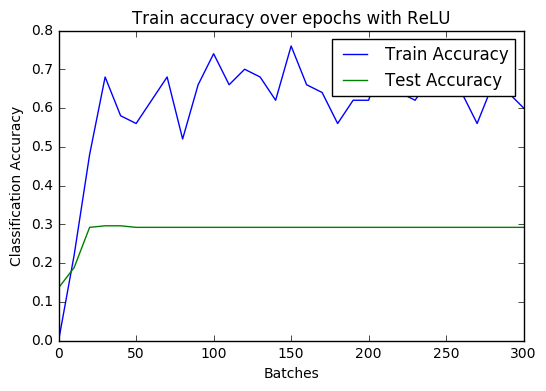

In [103]:
x_val_plt = np.array(range(31)) * 10
np_train_accuracy = np.array(train_accuracy)
np_test_accuracy = np.array(test_accuracy)

plt.plot(x_val_plt, np_train_accuracy, label = "Train Accuracy")
plt.plot(x_val_plt, np_test_accuracy, label = "Test Accuracy")
plt.title("Train accuracy over epochs with ReLU")
plt.xlabel("Batches")
plt.ylabel("Classification Accuracy")
plt.legend()
plt.show()

The network seems to learn a bit slower with ReLU but still ends up just outputing ooo non stop

In [106]:
node_count = 20

x = tf.placeholder(tf.float32, shape=[None, 100])
y_ = tf.placeholder(tf.float32, shape=[None, 8])

# Define the first layer here
W = weight_variable([100, node_count])
b = bias_variable([node_count])
h = tf.nn.tanh(tf.matmul(x, W) + b)

# Use dropout for this layer (should you wish)
keep_prob = tf.placeholder(tf.float32)
h_drop = tf.nn.dropout(h, keep_prob)

# Define the first layer here
V = weight_variable([node_count, 8])
c = bias_variable([8])
y = tf.nn.softmax(tf.matmul(h_drop, V) + c)

# We'll use the cross entropy loss function 
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, y_))

# And classification accuracy
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# And the Adam optimiser
train_step = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(cross_entropy)

# Start a tf session and run the optimisation algorithm
sess = tf.Session()
sess.run(tf.initialize_all_variables())

input_data = train_bow
input_labels = train_labels_onehot
train_accuracy = np.zeros(31)
test_accuracy = np.zeros(31)
N = 0
C = 0

for epoch in range(10):
    for bat in range(len(input_data) // 50):
        data_batch = input_data[bat * 50 : (bat + 1) * 50]
        labels_batch = input_labels[bat * 50 : (bat + 1) * 50]
        N += 1
        if N % 10 == 0:
            train_accuracy[C] = sess.run(accuracy, feed_dict={x: data_batch, y_: labels_batch, keep_prob: 1.0})
            test_accuracy[C] = sess.run(accuracy, feed_dict={x: test_bow, y_: test_labels_onehot, keep_prob: 1.0})
            C += 1
        sess.run(train_step, feed_dict={x: data_batch, y_: labels_batch, keep_prob: 0.5})
    temp = list(zip(input_data, input_labels))
    random.shuffle(temp)
    input_data, input_labels = zip(*temp)

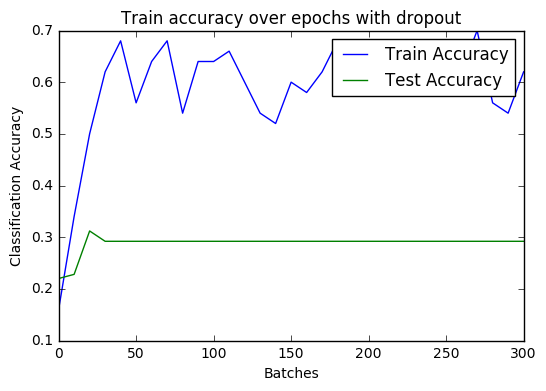

In [107]:
x_val_plt = np.array(range(31)) * 10
np_train_accuracy = np.array(train_accuracy)
np_test_accuracy = np.array(test_accuracy)

plt.plot(x_val_plt, np_train_accuracy, label = "Train Accuracy")
plt.plot(x_val_plt, np_test_accuracy, label = "Test Accuracy")
plt.title("Train accuracy over epochs with dropout")
plt.xlabel("Batches")
plt.ylabel("Classification Accuracy")
plt.legend()
plt.show()

The network seems to take longer to learn at first, but it does reach a higher accuracy before just deciding to output ooo non stop

In [108]:
node_count = 50

x = tf.placeholder(tf.float32, shape=[None, 100])
y_ = tf.placeholder(tf.float32, shape=[None, 8])

# Define the first layer here
W = weight_variable([100, node_count])
b = bias_variable([node_count])
h = tf.nn.tanh(tf.matmul(x, W) + b)

# Define the first layer here
V = weight_variable([node_count, 8])
c = bias_variable([8])
y = tf.nn.softmax(tf.matmul(h, V) + c)

# We'll use the cross entropy loss function 
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, y_))

# And classification accuracy
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# And the Adam optimiser
train_step = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(cross_entropy)

# Start a tf session and run the optimisation algorithm
sess = tf.Session()
sess.run(tf.initialize_all_variables())

input_data = train_bow
input_labels = train_labels_onehot
train_accuracy = np.zeros(31)
test_accuracy = np.zeros(31)
N = 0
C = 0

for epoch in range(10):
    for bat in range(len(input_data) // 50):
        data_batch = input_data[bat * 50 : (bat + 1) * 50]
        labels_batch = input_labels[bat * 50 : (bat + 1) * 50]
        N += 1
        if N % 10 == 0:
            train_accuracy[C] = sess.run(accuracy, feed_dict={x: data_batch, y_: labels_batch})
            test_accuracy[C] = sess.run(accuracy, feed_dict={x: test_bow, y_: test_labels_onehot})
            C += 1
        sess.run(train_step, feed_dict={x: data_batch, y_: labels_batch})
    temp = list(zip(input_data, input_labels))
    random.shuffle(temp)
    input_data, input_labels = zip(*temp)

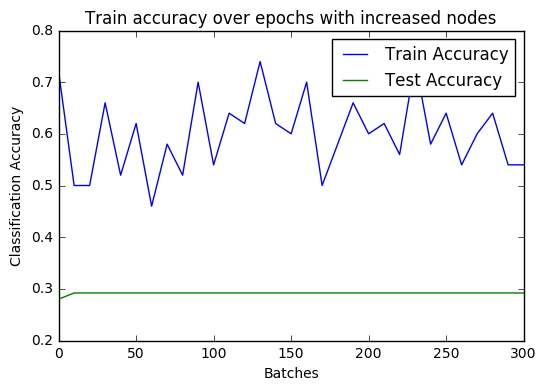

In [109]:
x_val_plt = np.array(range(31)) * 10
np_train_accuracy = np.array(train_accuracy)
np_test_accuracy = np.array(test_accuracy)

plt.plot(x_val_plt, np_train_accuracy, label = "Train Accuracy")
plt.plot(x_val_plt, np_test_accuracy, label = "Test Accuracy")
plt.title("Train accuracy over epochs with increased nodes")
plt.xlabel("Batches")
plt.ylabel("Classification Accuracy")
plt.legend()
plt.show()

Faster learnding but still same result

In [169]:
node_count_1 = 20
node_count_2 = 20

x = tf.placeholder(tf.float32, shape=[None, 100])
y_ = tf.placeholder(tf.float32, shape=[None, 8])

# Define the first layer here
W_1 = weight_variable([100, node_count_1])
b_1 = bias_variable([node_count_1])
h_1 = tf.nn.tanh(tf.matmul(x, W_1) + b_1)

# Define the second layer here
W_2 = weight_variable([node_count_1, node_count_2])
b_2 = bias_variable([node_count_2])
h_2 = tf.nn.tanh(tf.matmul(h_1, W_2) + b_2)

# Define the first layer here
V = weight_variable([node_count_2, 8])
c = bias_variable([8])
y = tf.nn.softmax(tf.matmul(h_2, V) + c)

# We'll use the cross entropy loss function 
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, y_))

# And classification accuracy
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# And the Adam optimiser
train_step = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(cross_entropy)

# Start a tf session and run the optimisation algorithm
sess = tf.Session()
sess.run(tf.initialize_all_variables())

input_data = train_bow
input_labels = train_labels_onehot
train_accuracy = np.zeros(31)
test_accuracy = np.zeros(31)
N = 0
C = 0

for epoch in range(10):
    for bat in range(len(input_data) // 50):
        data_batch = input_data[bat * 50 : (bat + 1) * 50]
        labels_batch = input_labels[bat * 50 : (bat + 1) * 50]
        N += 1
        if N % 10 == 0:
            train_accuracy[C] = sess.run(accuracy, feed_dict={x: data_batch, y_: labels_batch})
            test_accuracy[C] = sess.run(accuracy, feed_dict={x: test_bow, y_: test_labels_onehot})
            C += 1
        sess.run(train_step, feed_dict={x: data_batch, y_: labels_batch})
    temp = list(zip(input_data, input_labels))
    random.shuffle(temp)
    input_data, input_labels = zip(*temp)

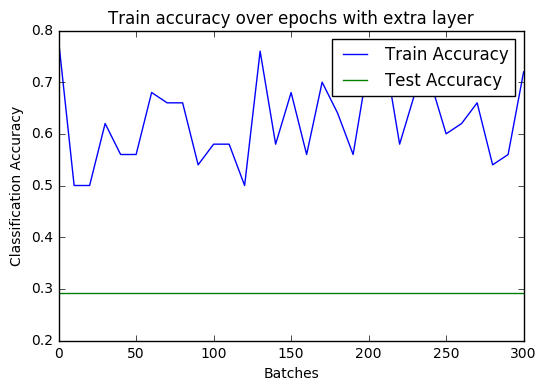

In [170]:
x_val_plt = np.array(range(31)) * 10
np_train_accuracy = np.array(train_accuracy)
np_test_accuracy = np.array(test_accuracy)

plt.plot(x_val_plt, np_train_accuracy, label = "Train Accuracy")
plt.plot(x_val_plt, np_test_accuracy, label = "Test Accuracy")
plt.title("Train accuracy over epochs with extra layer")
plt.xlabel("Batches")
plt.ylabel("Classification Accuracy")
plt.legend()
plt.show()

Learns extremelly fast but still same result.

In [139]:
if not os.path.isfile('glove.6B.zip'):
    urllib.request.urlretrieve("http://nlp.stanford.edu/data/glove.6B.zip", filename="glove.6B.zip")
glove = {}
with zipfile.ZipFile('glove.6B.zip', 'r') as z:
    with z.open('glove.6B.50d.txt', 'r') as file:
        for line in file:
            tokens = line.decode().replace("\r","").replace("\n","").split()
            if len(tokens) < 2: continue
            word = tokens[0]
            vec = np.array(list([float(i) for i in tokens[1:] if len(i) > 1]))
            if vec.shape[0] < 50: continue
            glove[word] = vec

In [140]:
glove['that']

array([ 0.88387  , -0.14199  ,  0.13566  ,  0.098682 ,  0.51218  ,
        0.49138  , -0.47155  , -0.30742  ,  0.01963  ,  0.12686  ,
        0.073524 ,  0.35836  , -0.60874  , -0.18676  ,  0.78935  ,
        0.54534  ,  0.1106   , -0.2923   ,  0.059041 , -0.69551  ,
       -0.18804  ,  0.19455  ,  0.32269  , -0.49981  ,  0.306    ,
       -2.3902   , -0.60749  ,  0.37107  ,  0.078912 , -0.23896  ,
        3.839    , -0.20355  , -0.35613  , -0.69185  , -0.17497  ,
       -0.35323  ,  0.10598  , -0.039303 ,  0.015701 ,  0.038279 ,
       -0.35283  ,  0.44882  , -0.16534  ,  0.31579  ,  0.14963  ,
       -0.071277 , -0.53506  ,  0.52711  , -0.20148  ,  0.0095952])

In [142]:
train_bow_glove = []

for talk in train_data:
    N = 0
    res = np.zeros(50)
    for sent in talk:
        for word in sent:
            if word in glove:
                res += glove[word]
                N += 1
    res = res / N
    train_bow_glove.append(res)

In [144]:
validation_bow_glove = []

for talk in validation_data:
    N = 0
    res = np.zeros(50)
    for sent in talk:
        for word in sent:
            if word in glove:
                res += glove[word]
                N += 1
    res = res / N
    validation_bow_glove.append(res)

In [145]:
test_bow_glove = []

for talk in test_data:
    N = 0
    res = np.zeros(50)
    for sent in talk:
        for word in sent:
            if word in glove:
                res += glove[word]
                N += 1
    res = res / N
    test_bow_glove.append(res)

In [148]:
node_count = 20

x = tf.placeholder(tf.float32, shape=[None, 50])
y_ = tf.placeholder(tf.float32, shape=[None, 8])

# Define the first layer here
W = weight_variable([50, node_count])
b = bias_variable([node_count])
h = tf.nn.tanh(tf.matmul(x, W) + b)

# Define the first layer here
V = weight_variable([node_count, 8])
c = bias_variable([8])
y = tf.nn.softmax(tf.matmul(h, V) + c)

# We'll use the cross entropy loss function 
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, y_))

# And classification accuracy
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# And the Adam optimiser
train_step = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(cross_entropy)

# Start a tf session and run the optimisation algorithm
sess = tf.Session()
sess.run(tf.initialize_all_variables())

input_data = train_bow_glove
input_labels = train_labels_onehot
train_accuracy = np.zeros(31)
test_accuracy = np.zeros(31)
N = 0
C = 0

for epoch in range(10):
    for bat in range(len(input_data) // 50):
        data_batch = input_data[bat * 50 : (bat + 1) * 50]
        labels_batch = input_labels[bat * 50 : (bat + 1) * 50]
        N += 1
        if N % 10 == 0:
            train_accuracy[C] = sess.run(accuracy, feed_dict={x: data_batch, y_: labels_batch})
            test_accuracy[C] = sess.run(accuracy, feed_dict={x: test_bow_glove, y_: test_labels_onehot})
            C += 1
        sess.run(train_step, feed_dict={x: data_batch, y_: labels_batch})
    temp = list(zip(input_data, input_labels))
    random.shuffle(temp)
    input_data, input_labels = zip(*temp)

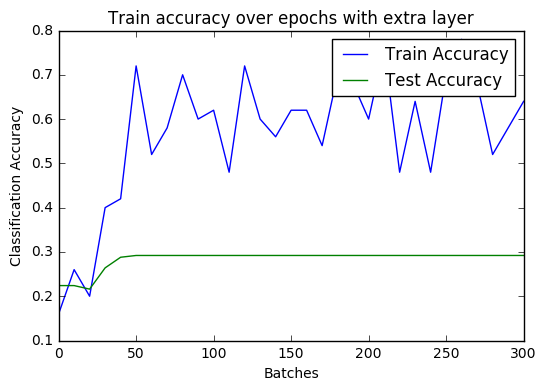

In [149]:
x_val_plt = np.array(range(31)) * 10
np_train_accuracy = np.array(train_accuracy)
np_test_accuracy = np.array(test_accuracy)

plt.plot(x_val_plt, np_train_accuracy, label = "Train Accuracy")
plt.plot(x_val_plt, np_test_accuracy, label = "Test Accuracy")
plt.title("Train accuracy over epochs with extra layer")
plt.xlabel("Batches")
plt.ylabel("Classification Accuracy")
plt.legend()
plt.show()

It takes network significantly less to learn which is expected but in the end just outputs ooo

In [179]:
node_count = 20

x = tf.placeholder(tf.float32, shape=[None, 100])
y_ = tf.placeholder(tf.float32, shape=[None, 8])

# Define the first layer here
W = weight_variable([100, node_count])
b = bias_variable([node_count])
h = tf.nn.tanh(tf.matmul(x, W) + b)

# Define the first layer here
V = weight_variable([node_count, 8])
c = bias_variable([8])
y = tf.nn.softmax(tf.matmul(h, V) + c)

# We'll use the cross entropy loss function 
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, y_))

# And classification accuracy
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# And the Adam optimiser
train_step = tf.train.AdamOptimizer(learning_rate=1e-5).minimize(cross_entropy)

# Start a tf session and run the optimisation algorithm
sess = tf.Session()
sess.run(tf.initialize_all_variables())

input_data = train_bow
input_labels = train_labels_onehot
train_accuracy = np.zeros(31)
test_accuracy = np.zeros(31)
N = 0
C = 0

for epoch in range(10):
    for bat in range(len(input_data) // 50):
        data_batch = input_data[bat * 50 : (bat + 1) * 50]
        labels_batch = input_labels[bat * 50 : (bat + 1) * 50]
        N += 1
        if N % 10 == 0:
            train_accuracy[C] = sess.run(accuracy, feed_dict={x: data_batch, y_: labels_batch})
            test_accuracy[C] = sess.run(accuracy, feed_dict={x: test_bow, y_: test_labels_onehot})
            C += 1
        sess.run(train_step, feed_dict={x: data_batch, y_: labels_batch})
    temp = list(zip(input_data, input_labels))
    random.shuffle(temp)
    input_data, input_labels = zip(*temp)

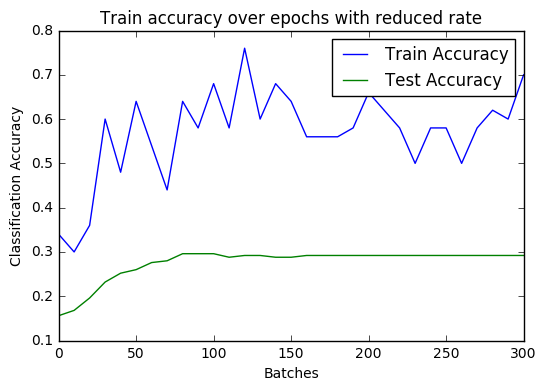

In [180]:
x_val_plt = np.array(range(31)) * 10
np_train_accuracy = np.array(train_accuracy)
np_test_accuracy = np.array(test_accuracy)

plt.plot(x_val_plt, np_train_accuracy, label = "Train Accuracy")
plt.plot(x_val_plt, np_test_accuracy, label = "Test Accuracy")
plt.title("Train accuracy over epochs with reduced rate")
plt.xlabel("Batches")
plt.ylabel("Classification Accuracy")
plt.legend()
plt.show()

It takes network significantly less to learn which is expected but in the end just outputs ooo

In [165]:
def euclidean_norm(tensor, reduction_indicies = None):
    squareroot_tensor = tf.sqrt(tensor)
    euclidean_norm = tf.reduce_sum(squareroot_tensor, 1)
    return euclidean_norm

In [166]:
node_count = 20

x = tf.placeholder(tf.float32, shape=[None, 100])
y_ = tf.placeholder(tf.float32, shape=[None, 3])

# Define the first layer here
W = weight_variable([100, node_count])
b = bias_variable([node_count])
h = tf.nn.tanh(tf.matmul(x, W) + b)

# Define the first layer here
V = weight_variable([node_count, 3])
c = bias_variable([3])
y = tf.nn.sigmoid(tf.matmul(h, V) + c)

# We'll use the cross entropy loss function 
cross_entropy = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(y, y_))

# And classification accuracy
correct_prediction = tf.equal(euclidean_norm(tf.round(y)), euclidean_norm(tf.round(y_)))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# And the Adam optimiser
train_step = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(cross_entropy)

# Start a tf session and run the optimisation algorithm
sess = tf.Session()
sess.run(tf.initialize_all_variables())

input_data = train_bow
input_labels = train_labels
train_accuracy = np.zeros(31)
test_accuracy = np.zeros(31)
N = 0
C = 0

for epoch in range(10):
    for bat in range(len(input_data) // 50):
        data_batch = input_data[bat * 50 : (bat + 1) * 50]
        labels_batch = input_labels[bat * 50 : (bat + 1) * 50]
        N += 1
        if N % 10 == 0:
            train_accuracy[C] = sess.run(accuracy, feed_dict={x: data_batch, y_: labels_batch})
            test_accuracy[C] = sess.run(accuracy, feed_dict={x: test_bow, y_: test_labels})
            C += 1
        sess.run(train_step, feed_dict={x: data_batch, y_: labels_batch})
    temp = list(zip(input_data, input_labels))
    random.shuffle(temp)
    input_data, input_labels = zip(*temp)

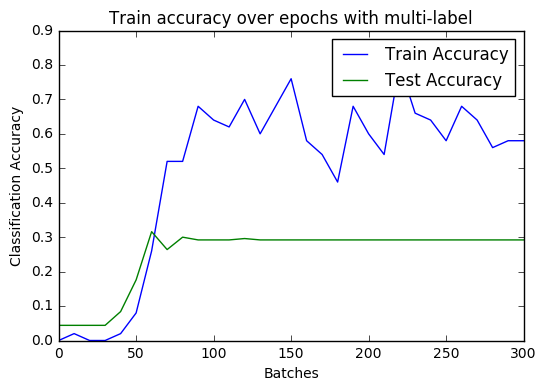

In [167]:
x_val_plt = np.array(range(31)) * 10
np_train_accuracy = np.array(train_accuracy)
np_test_accuracy = np.array(test_accuracy)

plt.plot(x_val_plt, np_train_accuracy, label = "Train Accuracy")
plt.plot(x_val_plt, np_test_accuracy, label = "Test Accuracy")
plt.title("Train accuracy over epochs with multi-label")
plt.xlabel("Batches")
plt.ylabel("Classification Accuracy")
plt.legend()
plt.show()

In [164]:
with sess.as_default():
    result = tf.reduce_sum(tf.round(y.eval(feed_dict={x: train_bow[0:10]})).eval(), 1).eval()

print(result)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
